In [1]:
from survey_coverage import get_known_survey_names, get_survey_by_name
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.wcs import WCS
import numpy as np

# Get list of surveys that are known

In [2]:
get_known_survey_names()

['UKIRT-dxs-H',
 'UKIRT-dxs-J',
 'UKIRT-gcs-H',
 'UKIRT-gcs-J',
 'UKIRT-gcs-Y',
 'UKIRT-gps-H',
 'UKIRT-gps-J',
 'UKIRT-gps2-H',
 'UKIRT-las-H',
 'UKIRT-las-J',
 'UKIRT-las-Y',
 'UKIRT-las2-J',
 'UKIRT-uds-H',
 'UKIRT-uds-J',
 'UKIRT-uhs-J',
 'VISTA-vhs-H',
 'VISTA-vhs-J',
 'VISTA-vhs-Y',
 'VISTA-video-H',
 'VISTA-video-J',
 'VISTA-video-Y',
 'VISTA-viking-H',
 'VISTA-viking-J',
 'VISTA-viking-Y',
 'VISTA-vmc-J',
 'VISTA-vmc-Y',
 'VISTA-vvv-H',
 'VISTA-vvv-J',
 'VISTA-vvv-Y']

# Get a specific survey

In [3]:
survey = get_survey_by_name('UKIRT-uhs-J')
survey2 = get_survey_by_name('UKIRT-las-J')

# Set up axes and a coordinate system

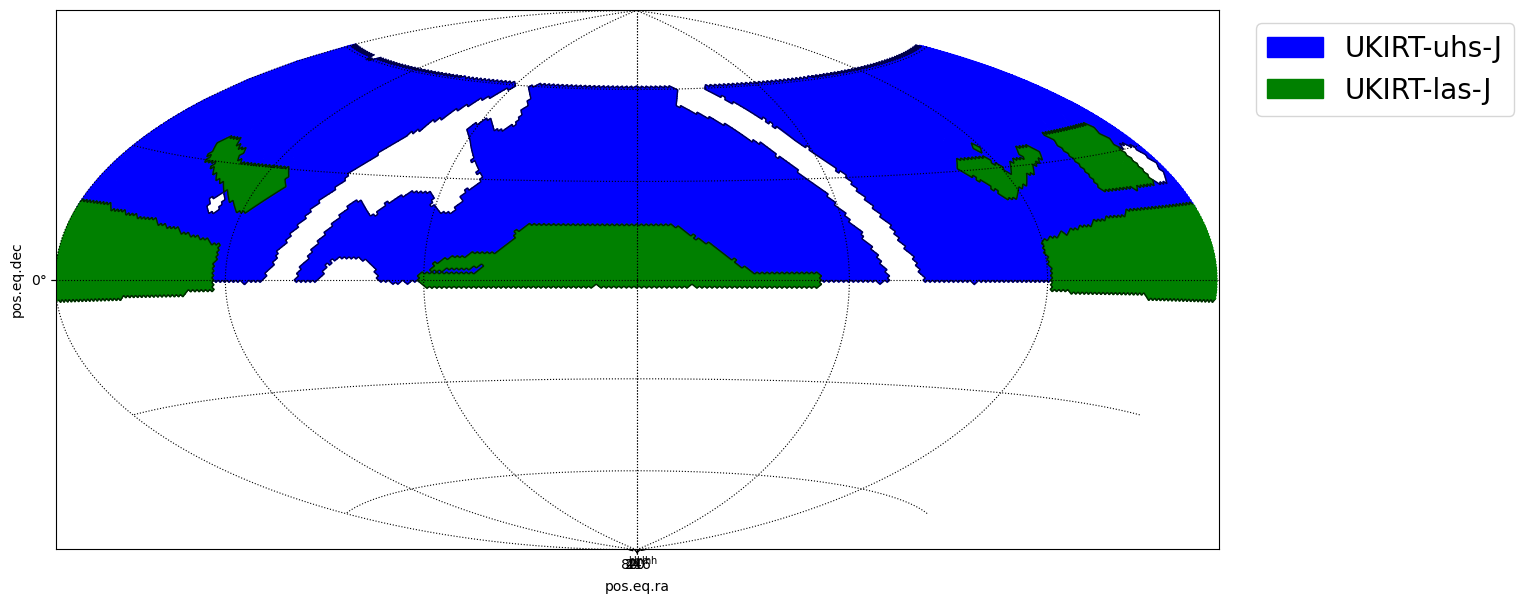

In [4]:
fig = plt.figure(figsize=(15,7))

wcs = WCS(naxis=2)
wcs.wcs.ctype = ["RA---AIT", "DEC--AIT"]
wcs.wcs.crval = [0.0, 0.0]
wcs.wcs.cdelt = np.array([-0.675, 0.675])
wcs.wcs.crpix = [240.5, 120.5]

ax = plt.subplot(projection=wcs)

survey.plot_coverage(ax=ax, wcs=wcs, border=True, color='blue', label=f'{survey.survey_name}')
survey2.plot_coverage(ax=ax, wcs=wcs, border=True, color='green', label=f'{survey2.survey_name}')

plt.legend(bbox_to_anchor=(1.02, 1), fontsize=20)    
plt.grid(color="black", linestyle="dotted")

# Check if given coordinates are covered in a survey

In [5]:
survey = get_survey_by_name('UKIRT-uhs-J')
survey.contains(ra_deg=[280, 120], dec_deg=[75, 30])

array([False,  True])

# Get MOC data for a survey, if you want to manipulate it yourself

In [6]:
survey = get_survey_by_name('UKIRT-uhs-J')
moc = survey.get_moc_data()

# Add your own survey

Currently, only surveys with MOC coverage can be plotted, more can/will be added as required

In [7]:
from survey_coverage.surveys import MOCSurvey
MOCSurvey.__doc__

'\n    Class where the survey coverage is given in the healpix multi-order-coverage (MOC)\n    format\n    See : https://www.ivoa.net/documents/MOC/20190215/WD-MOC-1.1-20190215.pdf\n    '

In [ ]:
my_new_survey = MOCSurvey(survey_name='new_survey',
                          coverage_file='path_to_moc_file')